In [1]:
%load_ext autoreload
#%autoreload 2
%matplotlib inline

execfile ("_ImportScript.py")

1


In [2]:
# Make a Universe with large n_max
beatbox.You.initiate_simulated_universe( truncated_nmax=15, truncated_nmin=None, truncated_lmax=60, truncated_lmin=None, n_s=0.97,kstar=0.02,PSnorm=2.43e-9,Pdist=1,Pmax=2*np.pi,Pvar=0.0, fngrid=None, printout=1)

Generated  14146  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 1.2819413


/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:580: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*10000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


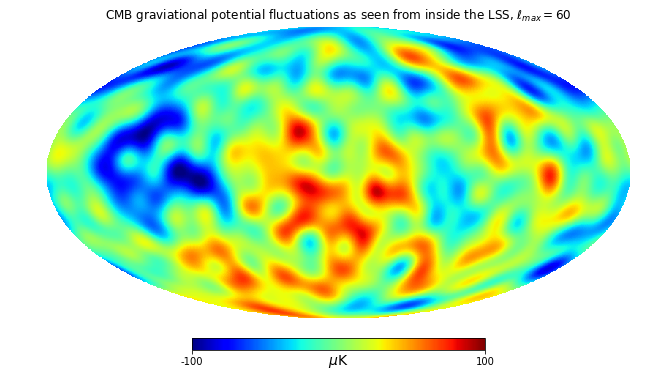

In [3]:
beatbox.You.all_simulated_universes[0].show_CMB_T_map()

Displaying sky map of the l =  6  and lower spherical harmonics only...
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


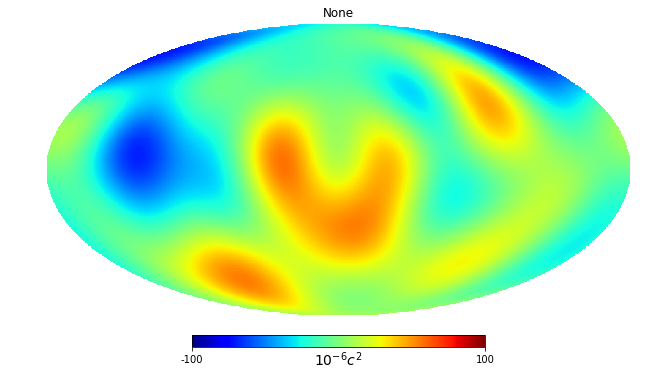

In [4]:
beatbox.You.all_simulated_universes[0].lmax=beatbox.You.all_simulated_universes[0].truncated_lmax
beatbox.You.all_simulated_universes[0].show_lowest_spherical_harmonics_of_CMB_T_map(lmax=6,max=100, cmap=None, title=None)

In [ ]:
MockUniverse[100].show_CMB_T_map()

In [ ]:
print beatbox.You.all_simulated_universes[-1].fngrid.shape
print beatbox.You.all_simulated_universes[0].fngrid.shape

Generated  256  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.6999174
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
[ -1.72164768e-06+0.j   3.91150089e+00+0.j   3.18345160e+00+0.j
   2.45506350e+00+0.j   1.38721876e+01+0.j  -5.92065574e+00+0.j]
[ -10.04263676-0.j  -78.26236098-0.j  -32.56654935-0.j -202.35913785-0.j
  -68.54569849+0.j]
[  0.00000000 +0.j         -35.03743762 +0.j          -0.88421566 +0.j
  -5.08353980 +0.j           7.01695858 +0.j           2.71687540 +0.j
  -1.18610679 +0.j          10.22072121-29.5654331j
   5.60004440 -2.06047506j  -7.54199773 -1.12402831j
   1.99409370 -5.53834586j   1.99547518 -1.67730849j
  -2.13664765 -3.32180665j -15.44212491+14.99657308j
   0.95347165+10.37910279j  16.71177987 +2.1052638j
  -4.94763298 -4.67527199j   1.44944052 -1.52700044j
   2.85557787 +6.06493725j   5.58460176 -0.44148267j
 

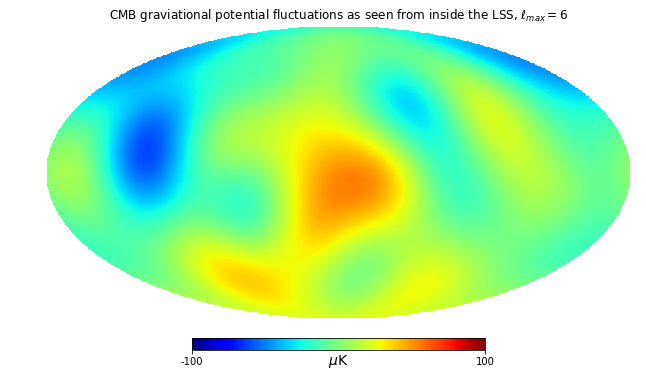

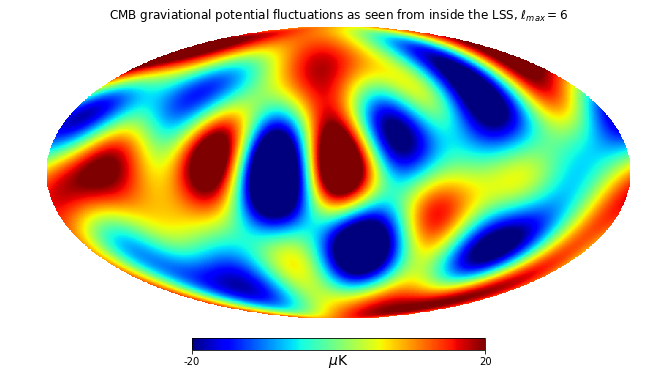

In [5]:
#beatbox.You.initiate_simulated_universe( truncated_nmax=15, truncated_nmin=None, truncated_lmax=60, truncated_lmin=None, n_s=0.97,kstar=0.02,PSnorm=2.43e-9,Pdist=1,Pmax=2*np.pi,Pvar=0.0, fngrid=None, printout=1)
beatbox.You.initiate_simulated_universe( truncated_nmax=4, truncated_nmin=None, truncated_lmax=6, truncated_lmin=None, n_s=0.97,kstar=0.02,PSnorm=2.43e-9,Pdist=1,Pmax=2*np.pi,Pvar=0.0, fngrid=None, printout=1)
beatbox.You.all_simulated_universes[-1].fngrid = beatbox.You.all_simulated_universes[0].fngrid * beatbox.You.all_simulated_universes[-1].kfilter
beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm( truncated_nmax=beatbox.You.all_simulated_universes[-1].truncated_nmax, truncated_nmin=beatbox.You.all_simulated_universes[-1].truncated_nmin,truncated_lmax=beatbox.You.all_simulated_universes[-1].truncated_lmax, truncated_lmin=beatbox.You.all_simulated_universes[-1].truncated_lmin, usedefault=0)
beatbox.You.all_simulated_universes[-1].show_CMB_T_map()
residual = beatbox.Universe()
residual.NSIDE = 256
residual.show_CMB_T_map(Tmap=beatbox.You.all_simulated_universes[-1].Tmap-beatbox.You.all_simulated_universes[0].truncated_map, max=20)
residual.decompose_T_map_into_spherical_harmonics()
print residual.alm[0:6]
print (beatbox.You.all_simulated_universes[-1].alm[1:6]-beatbox.You.all_simulated_universes[0].alm[1:6])/beatbox.You.all_simulated_universes[0].alm[1:6]*100
print beatbox.You.all_simulated_universes[-1].alm
print beatbox.You.all_simulated_universes[0].alm[0:6]

In [ ]:
this_file='RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/TrueUniverse'
beatbox.You.all_simulated_universes[0].write_CMB_T_map(from_this=beatbox.You.all_simulated_universes[0].Tmap, to_this=this_file)

In [ ]:
# Calculate C_yy from the 100 posterior sample Commander Planck CMB temperature maps 
#    or load the C_yy matrix if already calculated
if not os.path.isfile('../data/covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin)):
    beatbox.You.read_Planck_samples()
    beatbox.You.calculate_covariance_matrix(filename='lmax%d_lmin%d' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
else:
    beatbox.You.load_covariance_matrix(filename='covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
    
# Calculate the inverse of the a_y covariance matrix
beatbox.You.calculate_sdv_Cyy_inverse()

In [ ]:
numreal = 1000
MockUniverse = np.array([])
MockUniverse = np.append(MockUniverse, [beatbox.Universe() for i in range(numreal)])
beatbox.You.all_simulated_universes[0].lms = [(l, m) for l in range(beatbox.You.all_simulated_universes[0].truncated_lmin,beatbox.You.all_simulated_universes[0].truncated_lmax+1) for m in range(-l, l+1)]
MockUniverse[0].truncated_lmax = 60
MockUniverse[0].truncated_nmax = 15
MockUniverse[0].set_instance_k_filter(truncated_nmax=None,truncated_nmin=None)
MockUniverse[0].populate_instance_response_matrix(truncated_nmax=None, truncated_nmin=None,truncated_lmax=None, truncated_lmin=None, usedefault=1)
for i in range(numreal):
    MockUniverse[i].truncated_lmax = MockUniverse[0].truncated_lmax
    MockUniverse[i].truncated_nmax=MockUniverse[0].truncated_nmax
    MockUniverse[i].R = MockUniverse[0].R 
    MockUniverse[i].kfilter = MockUniverse[0].kfilter
    MockUniverse[i].lms = beatbox.You.all_simulated_universes[0].lms 

In [ ]:
Noise = np.zeros(len(beatbox.You.all_simulated_universes[0].ay))
ay_real = beatbox.You.all_simulated_universes[0].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[0].ay)
beatbox.You.all_simulated_universes[0].ay_real = ay_real
for n in range(numreal):
    Noise[:beatbox.You.C_yy.shape[0]] = beatbox.You.generate_one_realization_of_noise()
    MockUniverse[n].ay_real = beatbox.You.all_simulated_universes[0].ay_real + Noise
    MockUniverse[n].ayreal2ay_for_mapping(MockUniverse[n].ay_real)
    MockUniverse[n].ay2alm(MockUniverse[n].ay, truncated_lmax=MockUniverse[n].truncated_lmax, truncated_lmin=MockUniverse[n].truncated_lmin, usedefault=0)
    MockUniverse[n].Tmap = hp.alm2map(MockUniverse[n].alm, 256)
    this_file='RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/MockUniverse_'+str(n)
    MockUniverse[n].write_CMB_T_map(from_this=MockUniverse[n].Tmap, to_this=this_file)


In [ ]:
beatbox.You.create_original_Universe()
beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, beatbox.Universe())
beatbox.You.all_simulated_universes[-1].fngrid= beatbox.You.all_simulated_universes[0].fngrid * beatbox.Universe.kfilter
beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm()
beatbox.You.all_simulated_universes[-1].show_CMB_T_map()


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Generated  898  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.6818415


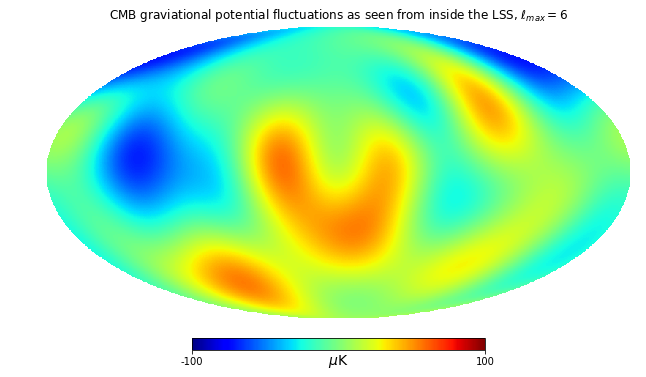

In [4]:
MOCK = 0
numreal = 1
beatbox.You.create_original_Universe()

beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, beatbox.Universe())
#beatbox.You.large_k_filter = beatbox.You.all_simulated_universes[0].kfilter
beatbox.You.all_simulated_universes[-1].fngrid = beatbox.You.all_simulated_universes[0].fngrid * beatbox.You.all_simulated_universes[1].kfilter
beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm()
beatbox.You.all_simulated_universes[-1].show_CMB_T_map()
beatbox.You.all_simulated_universes[0] = beatbox.Universe()
beatbox.You.all_simulated_universes[0].generate_a_random_potential_field()

# beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, beatbox.Universe())
# fromthis = 'RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/TrueUniverse.fits'
# beatbox.You.all_simulated_universes[-1].read_in_CMB_T_map(from_this = fromthis)
# beatbox.You.all_simulated_universes[-1].decompose_T_map_into_spherical_harmonics(lmax=60)
# beatbox.You.all_simulated_universes[-1].alm2ay()
# beatbox.You.all_simulated_universes[-1].ay2alm(beatbox.You.all_simulated_universes[-1].ay)

beatbox.You.all_reconstructed_universes = np.append(beatbox.You.all_reconstructed_universes, [beatbox.Universe() for i in range(numreal)])
MockUniverse = np.array([])
MockUniverse = np.append(MockUniverse, [beatbox.Universe() for i in range(numreal)])
pvals=np.array([])
chi2vals=np.array([])

#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=8, usetex=True)
from matplotlib import cm
cmap = cm.RdBu_r
cmap.set_under('w')

max=100

# Calculate C_yy from the 100 posterior sample Commander Planck CMB temperature maps 
#    or load the C_yy matrix if already calculated
if not os.path.isfile('../data/covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin)):
    beatbox.You.read_Planck_samples()
    beatbox.You.calculate_covariance_matrix(filename='lmax%d_lmin%d' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
else:
    beatbox.You.load_covariance_matrix(filename='covCyy_lmax%d_lmin%d.txt' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
    
# Calculate the inverse of the a_y covariance matrix
beatbox.You.calculate_sdv_Cyy_inverse()




In [5]:
beatbox.Multiverse.truncated_lmax

6

In [42]:

for n in range(numreal):
    fromthis = 'RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/MockUniverse_'+str(n)+'.fits'
    #fromthis = '../data/commander_32band_Clsamples100/cmb_Cl_c0001_k00031.fits'
    
    
    beatbox.You.all_data_universes = np.append(beatbox.You.all_data_universes, beatbox.Universe())
    
    datamap = beatbox.You.all_simulated_universes[-1].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[-1].ay)+beatbox.You.generate_one_realization_of_noise().reshape(48,)
    beatbox.You.all_simulated_universes[-1].ay_real = datamap
    #beatbox.You.all_data_universes[n].read_in_CMB_T_map(from_this = fromthis)
    #beatbox.You.all_data_universes[n].large_l_Tmap = beatbox.You.all_data_universes[n].Tmap
    #beatbox.You.all_data_universes[n].decompose_T_map_into_spherical_harmonics(lmax=60)
    #calculate the ays with lmax of 6 since lms vector has lmax of 6 in it.
    #beatbox.You.all_data_universes[n].alm2ay()
    #makes the aml's with lower lmax (6 instead of 60)
    #beatbox.You.all_data_universes[n].ay2alm(beatbox.You.all_data_universes[n].ay)
    #datamap = beatbox.You.all_data_universes[n].ay2ayreal_for_inference(beatbox.You.all_data_universes[n].ay)
    #beatbox.You.all_data_universes[n].ay_real = datamap
    
    filename = 'nmax=4-lmax=6'
    
    if os.path.isfile('../data/NewAcov_'+filename+'.txt'):
    #    beatbox.You.read_Planck_samples()
    #    beatbox.You.calculate_covariance_matrix(filename='lmax%d_lmin%d' % (beatbox.Multiverse.truncated_lmax, beatbox.Multiverse.truncated_lmin))
    #else:
        beatbox.You.NewAcov = np.loadtxt('../data/NewAcov_'+filename+'.txt')
        beatbox.You.invA4dotA2t = np.loadtxt('../data/invA4dotA2t_'+filename+'.txt')
        
    beatbox.You.solve_for_3D_potential_marginalized_over_large_n(datamap, print_alpha=0, truncated_nmax=3, nmax=None, NewAcov = beatbox.You.NewAcov)
    
    #filename = 'nmax%d' % (beatbox.Multiverse.truncated_nmax)
    
    #np.savetxt( "../data/NewAcov_"+filename+".txt", beatbox.You.NewAcov)
    
    #execfile ('_ReconstructionScript.py')
    MockUniverse[n]=beatbox.You.all_data_universes[n]
    beatbox.You.all_reconstructed_universes[n].fn = beatbox.You.reconstrunct_fn
    beatbox.You.all_reconstructed_universes[n].transform_3D_potential_into_alm(usedefault=1, fn=1)
    beatbox.You.all_reconstructed_universes[n].rearrange_fn_from_vector_to_grid()
    #beatbox.You.all_reconstructed_universes[n].evaluate_potential_given_fourier_coefficients()
    
    #p_value, chi2value = beatbox.You.calculate_chi2_in_posterior( beatbox.You.all_simulated_universes[-1].fn, beatbox.You.all_reconstructed_universes[n].fn)
    #pvals = np.append(pvals, p_value)
    #chi2vals = np.append(chi2vals, chi2value)

ValueError: shape mismatch: value array of shape (21,14146) could not be broadcast to indexing result of shape (21,256)

In [27]:
filename = 'nmax=4-lmax=6'
    
np.savetxt( "../data/NewAcov_"+filename+".txt", beatbox.You.NewAcov)
#np.savetxt( "../data/inv_4A"+filename+".txt", beatbox.You.inv_A4)
np.savetxt( "../data/reconstrunct_fn_ordformarg"+filename+".txt", beatbox.You.reconstrunct_fn_ordformarg)
    

In [28]:
filename = 'nmax=4-lmax=6'
print  beatbox.You.invA4dotA2t.shape  
np.savetxt( "../data/invA4dotA2t_"+filename+".txt", beatbox.You.invA4dotA2t)


(14034, 112)


In [30]:
np.savetxt('../data/reconstrunct_fn'+filename+'.txt', beatbox.You.reconstrunct_fn)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 0.2851607


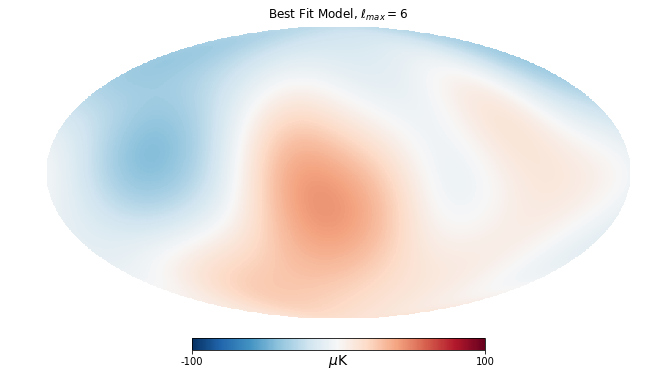

In [84]:
We = beatbox.Universe()
We.fn = beatbox.You.reconstrunct_fn
#We.fn = beatbox.You.all_simulated_universes[-1].fn * 0.5
We.transform_3D_potential_into_alm(truncated_nmax=We.truncated_nmax, truncated_nmin=We.truncated_nmin,truncated_lmax=6, truncated_lmin=We.truncated_lmin,usedefault=1, fn=1)
We.show_CMB_T_map(title = "Best Fit Model", from_perspective_of="observer", cmap=cmap, max=100)
We.rearrange_fn_from_vector_to_grid()
We.evaluate_potential_given_fourier_coefficients()

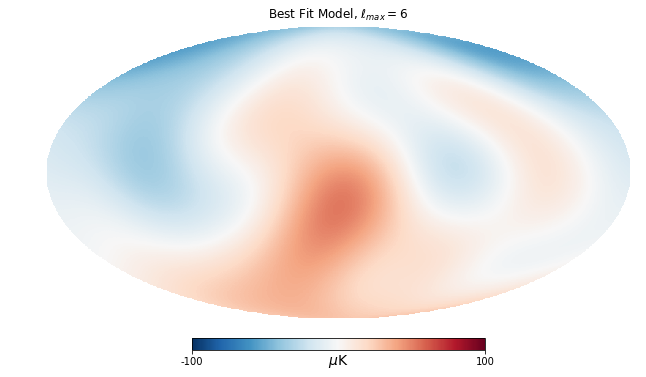

In [289]:
beatbox.You.all_simulated_universes[-1].show_CMB_T_map(Tmap=beatbox.You.all_simulated_universes[-1].Tmap, title = "Best Fit Model", from_perspective_of="observer", cmap=cmap, max=100)
this_file='RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/TrueCut-1Uni_'+str(n)
beatbox.You.all_simulated_universes[-1].write_CMB_T_map(beatbox.You.all_simulated_universes[-1].Tmap, to_this=this_file)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


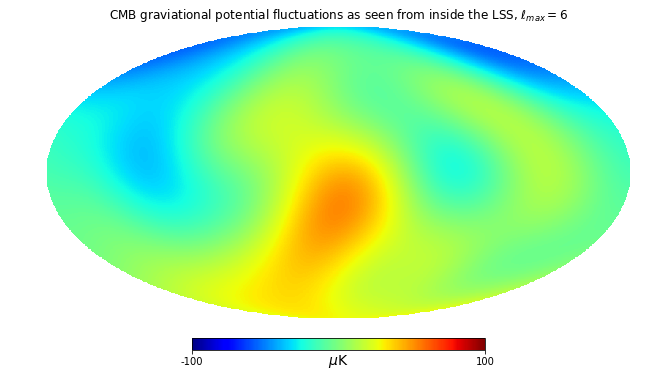

In [54]:
#beatbox.You.initiate_simulated_universe( truncated_nmax=2, truncated_nmin=None, truncated_lmax=6, truncated_lmin=None, n_s=0.97,kstar=0.02,PSnorm=2.43e-9,Pdist=1,Pmax=2*np.pi,Pvar=0.0, fngrid=None, printout=1)
#beatbox.You.all_simulated_universes[-1].fngrid = beatbox.You.all_simulated_universes[-4].fngrid * beatbox.You.all_simulated_universes[-1].kfilter
#beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm( truncated_nmax=beatbox.You.all_simulated_universes[-1].truncated_nmax, truncated_nmin=beatbox.You.all_simulated_universes[-1].truncated_nmin,truncated_lmax=beatbox.You.all_simulated_universes[-1].truncated_lmax, truncated_lmin=beatbox.You.all_simulated_universes[-1].truncated_lmin, usedefault=0)
beatbox.You.all_simulated_universes[-2].show_CMB_T_map()

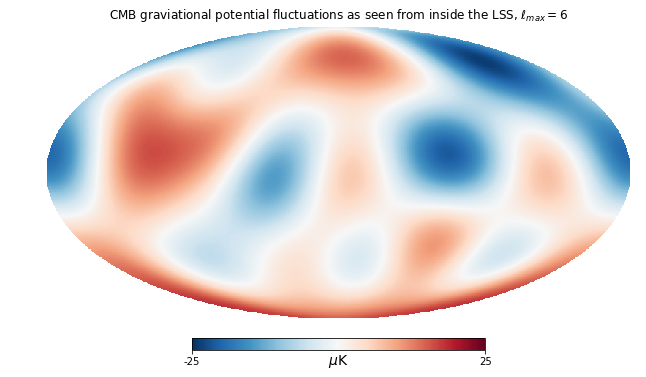

In [86]:
#residual = beatbox.Universe()
#residual.NSIDE = 256
residual.show_CMB_T_map(Tmap=beatbox.You.all_simulated_universes[-1].Tmap-We.Tmap,cmap=cmap, max=25)



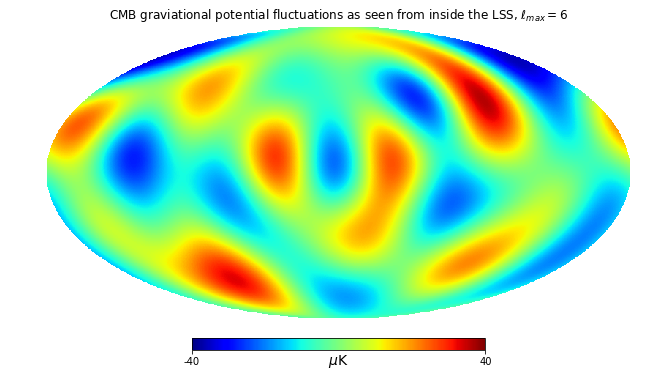

In [14]:
residual2 = beatbox.Universe()
residual2.NSIDE = 256
residual2.show_CMB_T_map(Tmap=beatbox.You.all_simulated_universes[-2].Tmap-We.Tmap, max=40)

Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 0.9633692


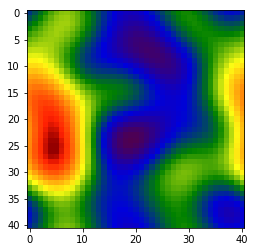

In [83]:
import matplotlib.pyplot as plt
beatbox.You.all_simulated_universes[3].evaluate_potential_given_fourier_coefficients()
plt.imshow(beatbox.You.all_simulated_universes[3].phi[:,:, 21])

In [87]:
from matplotlib.patches import Circle

Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 0.8311568


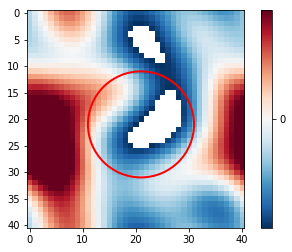

In [135]:
import matplotlib.pyplot as plt
beatbox.You.all_simulated_universes[-1].rearrange_fn_from_vector_to_grid()
beatbox.You.all_simulated_universes[-1].evaluate_potential_given_fourier_coefficients()
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
circ = Circle((21,21),10, facecolor='none', edgecolor='r', lw=2)
ax.add_patch(circ)

cax=plt.imshow(beatbox.You.all_simulated_universes[-1].phi[:,:, 21], vmin=-1.5, vmax=1.5, cmap=cmap)
cbar = fig.colorbar(cax, ticks=[-100, 0, 100])

plt.show()



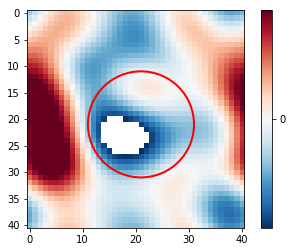

In [286]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
circ = Circle((21,21),10, facecolor='none', edgecolor='r', lw=2)
ax.add_patch(circ)
cax = plt.imshow(beatbox.You.all_simulated_universes[3].phi[:,:, 21]-We.phi[:,:,21], vmin=-1.5, vmax=1.5, cmap=cmap)

cbar = fig.colorbar(cax, ticks=[-100, 0, 100])

plt.show()

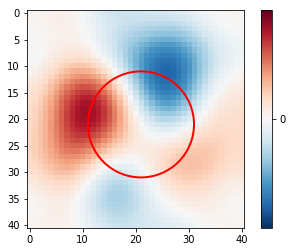

In [287]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
circ = Circle((21,21),10, facecolor='none', edgecolor='r', lw=2)
ax.add_patch(circ)
cax = plt.imshow(We.phi[:,:,21], vmin=-1.5, vmax=1.5, cmap=cmap)

cbar = fig.colorbar(cax, ticks=[-100, 0, 100])

plt.show()

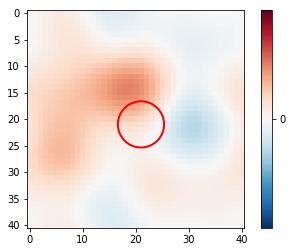

In [147]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
circ = Circle((21,21),np.sqrt(19), facecolor='none', edgecolor='r', lw=2)
ax.add_patch(circ)
cax = plt.imshow(We.phi[:,:,21+9], vmin=-1.5, vmax=1.5, cmap=cmap)

cbar = fig.colorbar(cax, ticks=[-100, 0, 100])

plt.show()

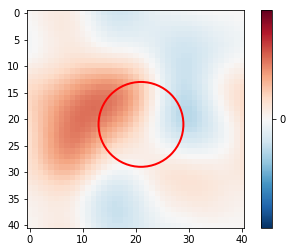

In [148]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
circ = Circle((21,21),np.sqrt(64), facecolor='none', edgecolor='r', lw=2)
ax.add_patch(circ)
cax = plt.imshow(We.phi[:,:,21+6], vmin=-1.5, vmax=1.5, cmap=cmap)

cbar = fig.colorbar(cax, ticks=[-100, 0, 100])

plt.show()

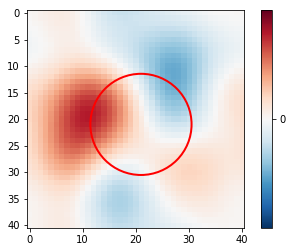

In [149]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
circ = Circle((21,21),np.sqrt(91), facecolor='none', edgecolor='r', lw=2)
ax.add_patch(circ)
cax = plt.imshow(We.phi[:,:,21+3], vmin=-1.5, vmax=1.5, cmap=cmap)

cbar = fig.colorbar(cax, ticks=[-100, 0, 100])

plt.show()

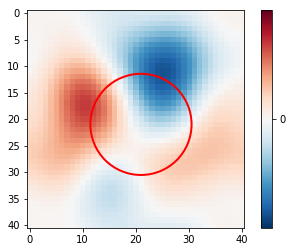

In [133]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
circ = Circle((21,21),np.sqrt(91), facecolor='none', edgecolor='r', lw=2)
ax.add_patch(circ)
cax = plt.imshow(We.phi[:,:,21-3], vmin=-1.5, vmax=1.5, cmap=cmap)

cbar = fig.colorbar(cax, ticks=[-100, 0, 100])

plt.show()

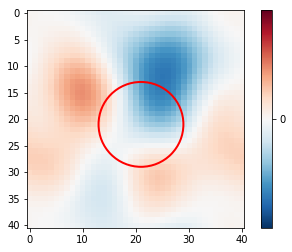

In [132]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
circ = Circle((21,21),8, facecolor='none', edgecolor='r', lw=2)
ax.add_patch(circ)
cax = plt.imshow(We.phi[:,:,21-6],vmin=-1.5, vmax=1.5, cmap=cmap)

cbar = fig.colorbar(cax, ticks=[-100, 0, 100])

plt.show()

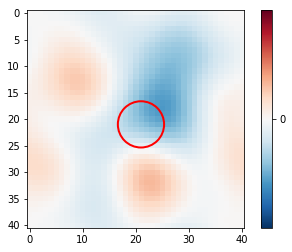

In [131]:
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
circ = Circle((21,21),np.sqrt(19), facecolor='none', edgecolor='r', lw=2)
ax.add_patch(circ)
cax = plt.imshow(We.phi[:,:,21-9], vmin=-1.5, vmax=1.5, cmap=cmap)

cbar = fig.colorbar(cax, ticks=[-100, 0, 100])

plt.show()

[ 23.5619449   23.5619449   23.40433815 ...,   4.71238898   3.14159265
   1.57079633]


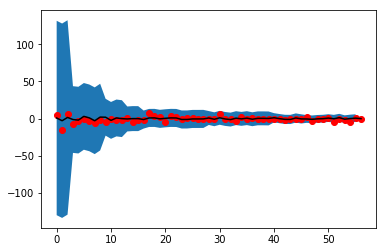

In [282]:
c=0
d=57
index = np.where(beatbox.You.all_simulated_universes[-1].kfilter!=0)
a=We.k[index]
print a[:len(index[1])/2]

ind = np.argsort(a[:len(index[1])/2], axis=None)

plt.plot(x.T[c:d],(beatbox.You.all_simulated_universes[-1].fn[ind])[c:d], 'ro')
plt.plot(x.T[c:d],(We.fn[ind])[c:d], 'k-')

error=np.zeros((len(We.fn),1))
error[kvec1_ind,0]= np.diag(beatbox.You.inv_NewAcov)[0:len(ind)]
orderederrors = error[ind,0]
x=np.zeros((len(ind),))
x[:]=range(len(ind))

plt.fill_between(x.T[c:d], (We.fn[ind]-orderederrors)[c:d], (We.fn[ind]+orderederrors)[c:d], where=(We.fn[ind]+orderederrors)[c:d]>(We.fn[ind]-orderederrors)[c:d])
plt.show()

In [271]:
print x.shape, (We.fn[ind]-orderederrors).shape

(7073, 1) (7073,)


In [266]:
print orderederrors[20:25]
print (We.fn[ind])[20:25]
print (beatbox.You.all_simulated_universes[-1].fn[ind])[20:25]

[ 12.15674427  12.15777066  12.15725546  12.15576475  12.15569117]
[ 0.45066738  1.00227255  0.89444875 -1.1192665  -1.09559139]
[-4.71610709  3.61253213  2.01843683 -0.32998853  0.3658176 ]


In [140]:
print (We.fn[np.where(We.fn!=0)]- beatbox.You.all_simulated_universes[-1].fn[np.where(beatbox.You.all_simulated_universes[-1].fn != 0)])/ beatbox.You.all_simulated_universes[-1].fn[np.where(beatbox.You.all_simulated_universes[-1].fn != 0)]
print We.fn[np.where(We.fn!=0)].shape

[ -6.61520388e-01  -4.45293154e-01  -1.18066213e+00   6.15214860e-01
  -1.10628388e+00  -1.03638421e+00  -2.21847188e+00  -5.56860668e-01
  -1.43007390e+00  -1.09555919e+00  -2.81011264e+00  -1.70099007e+00
  -1.11296188e+00  -1.88809177e+00  -4.33420504e+01   1.00528251e-02
  -1.01910392e+00  -6.69200285e-01  -3.13604288e+00  -3.99491165e+00
  -8.69957194e+00  -7.42494506e-01  -1.80272403e+00  -9.89771079e-01
  -5.30291719e-01   3.31281243e+01  -1.78644416e+02  -7.22556778e-01
  -4.02897514e+00  -7.23955849e-01  -1.30197600e+00  -8.84197269e-01
  -1.34244519e+00  -1.38200896e+00  -2.21022545e+00  -1.46187302e+00
  -3.98394584e+00  -1.12591745e+00  -8.25396847e-01  -6.57794487e-01
  -3.81085058e-01  -1.15845664e+00  -3.04980460e-01   1.04611544e+02
   2.39183458e+00  -1.01039608e+00  -2.58896146e+00  -4.59631026e-01
   1.11914299e+01  -8.37893780e-01  -8.17756367e-01  -3.85151646e-01
  -4.42499911e-01  -9.67149221e-01  -1.01133956e+00  -8.13531041e-01
  -9.06809753e-01  -8.43910176e-01

In [75]:
print beatbox.You.all_simulated_universes[-1].fn[np.where(beatbox.You.all_simulated_universes[-1].fn != 0)]
print beatbox.You.all_simulated_universes[-1].fn[np.where(beatbox.You.all_simulated_universes[-1].fn != 0)].shape

[ -2.29012274e+00  -6.63124839e-01  -3.61368989e+00  -2.51964797e-01
   2.85023263e+00  -4.05652200e+00  -7.28092624e-01   2.01843683e+00
   9.96041847e-01  -4.71610709e+00  -6.44871701e-01  -9.32438212e-01
   2.41791673e+00  -4.34931288e-01  -3.02876394e-02   6.49027832e-01
  -9.17431473e-01  -8.27114967e-01   3.72383240e-01   3.65817598e-01
   1.64461756e-01  -3.66680230e+00  -4.74673422e-01  -2.06005202e+00
  -6.03465261e+00  -6.87599654e-02   4.78343475e-03   3.61253213e+00
  -1.00429716e+00   5.84168327e+00  -3.49340301e+00   8.00275865e+00
  -7.80805908e-01  -5.01579311e+00  -1.70598446e+00  -1.98951679e+00
  -2.87897999e-01   9.26920409e-02   6.39169886e+00   2.92302329e+00
  -6.92622173e-01   2.83650329e+00   1.08052629e+00  -1.01264644e-02
  -3.29988528e-01  -1.70130820e+00   2.54518444e-01  -1.84122564e+00
  -2.89788966e-02  -7.49791264e+00  -1.53267108e+01  -3.23345729e+00
  -2.19656229e+00  -4.23200513e+00  -4.73665238e+00   4.72660598e+00
  -5.70142967e+00  -3.52930965e+00

In [67]:
truncated_nmax=3
ind = np.where(beatbox.Universe.kfilter>0)
        
k, theta, phi = beatbox.Universe.k[ind], np.arctan2(beatbox.Universe.ky[ind],beatbox.Universe.kx[ind]), np.arccos(beatbox.Universe.kz[ind]/beatbox.Universe.k[ind])
        
        
kvec_long = np.zeros(2*len(ind[1]))
kvec_long[:len(ind[1])] = k
kvec_long[len(ind[1]):] = k
        
kvec = np.zeros(len(ind[1]))
kvec[:len(ind[1])/2] = kvec_long[:len(ind[1])/2]
kvec[len(ind[1])/2:] = kvec_long[len(ind[1]):3*len(ind[1])/2]
        
ind_for_A_marginalization = np.argsort(kvec)
        
kvec1_ind = ind_for_A_marginalization[np.in1d(ind_for_A_marginalization, np.where(kvec <= truncated_nmax*beatbox.Universe.Deltak), assume_unique=False)]
        
kvec2_ind = ind_for_A_marginalization[np.in1d(ind_for_A_marginalization, np.where(kvec > truncated_nmax*beatbox.Universe.Deltak), assume_unique=False)]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


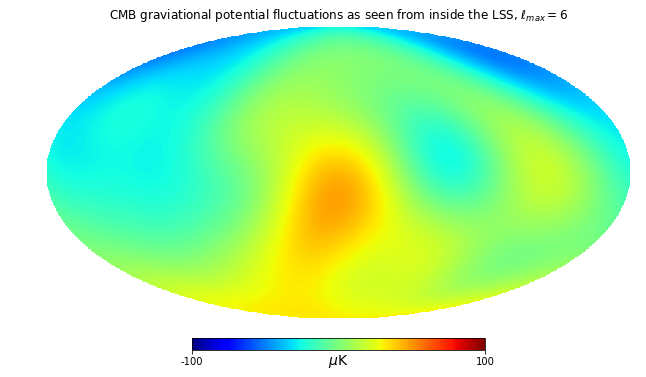

In [73]:
#beatbox.You.initiate_simulated_universe( truncated_nmax=15, truncated_nmin=None, truncated_lmax=6, truncated_lmin=None, n_s=0.97,kstar=0.02,PSnorm=2.43e-9,Pdist=1,Pmax=2*np.pi,Pvar=0.0, fngrid=None, printout=1)
beatbox.You.all_simulated_universes[-1].fn = np.zeros(len(kvec))
        
beatbox.You.all_simulated_universes[-1].fn[kvec1_ind] = beatbox.You.all_simulated_universes[1].fn[kvec1_ind]
beatbox.You.all_simulated_universes[-1].fn[kvec2_ind] = np.zeros(kvec2_ind.shape)

beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm( truncated_nmax=beatbox.You.all_simulated_universes[-1].truncated_nmax, truncated_nmin=beatbox.You.all_simulated_universes[-1].truncated_nmin,truncated_lmax=beatbox.You.all_simulated_universes[-1].truncated_lmax, truncated_lmin=beatbox.You.all_simulated_universes[-1].truncated_lmin, usedefault=0, fn=1)
beatbox.You.all_simulated_universes[-1].show_CMB_T_map()

In [12]:
from matplotlib import cm
cmap = cm.RdBu_r
cmap.set_under('w')

Displaying sky map of the l =  6  and lower spherical harmonics only...
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


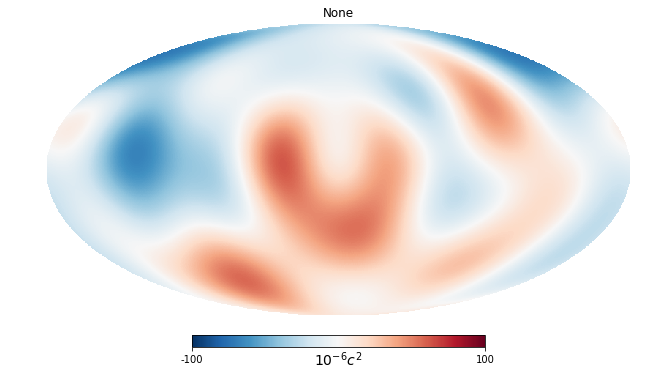

In [17]:
beatbox.You.all_data_universes[n].lmax=beatbox.You.all_data_universes[n].truncated_lmax
beatbox.You.all_data_universes[n].show_lowest_spherical_harmonics_of_CMB_T_map(lmax=6,max=100, cmap=cmap, title=None)

In [7]:
U2, s2, V_star2 = np.linalg.svd(beatbox.You.NewAcov)
inv_NewAcov = np.dot(V_star2.T, np.dot(np.diag(1./s2),U2.T))
beatbox.You.inv_NewAcov=inv_NewAcov
 

ind = np.where(beatbox.Universe.kfilter>0)
        
k, theta, phi = beatbox.Universe.k[ind], np.arctan2(beatbox.Universe.ky[ind],beatbox.Universe.kx[ind]), np.arccos(beatbox.Universe.kz[ind]/beatbox.Universe.k[ind])
        
kvec_long = np.zeros(2*len(ind[1]))
kvec_long[:len(ind[1])] = k
kvec_long[len(ind[1]):] = k
        
kvec = np.zeros(len(ind[1]))
kvec[:len(ind[1])/2] = kvec_long[:len(ind[1])/2]
kvec[len(ind[1])/2:] = kvec_long[len(ind[1]):3*len(ind[1])/2]
        
ind_for_A_marginalization = np.argsort(kvec)
        
kvec1_ind = ind_for_A_marginalization[np.in1d(ind_for_A_marginalization, np.where(kvec <= 2*beatbox.Universe.Deltak), assume_unique=False)]
        
kvec2_ind = ind_for_A_marginalization[np.in1d(ind_for_A_marginalization, np.where(kvec > 2*beatbox.Universe.Deltak), assume_unique=False)]

In [19]:
TrueUni = beatbox.Universe()
TrueUni.truncated_nmax=2
TrueUni.truncated_lmax=6

TrueUni.generate_a_random_potential_field(truncated_nmax=TrueUni.truncated_nmax, truncated_nmin=TrueUni.truncated_nmin, n_s=0.97,kstar=0.02,PSnorm=2.43e-9,Pdist=1,Pmax=2*np.pi,Pvar=0.0, printout=1)
TrueUni.transform_3D_potential_into_alm(truncated_nmax=TrueUni.truncated_nmax, truncated_nmin=TrueUni.truncated_nmin,truncated_lmax=TrueUni.truncated_lmax, truncated_lmin=TrueUni.truncated_lmin,usedefault=4)

TrueUni.fngrid = beatbox.You.all_data_universes[n].fngrid * TrueUni.kfilter
TrueUni.transform_3D_potential_into_alm( truncated_nmax=TrueUni.truncated_nmax, truncated_nmin=TrueUni.truncated_nmin,truncated_lmax=TrueUni.truncated_lmax, truncated_lmin=TrueUni.truncated_lmin, usedefault=0)
TrueUni.show_CMB_T_map()

Generated  32  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.7601461


AttributeError: 'Universe' object has no attribute 'fngrid'

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


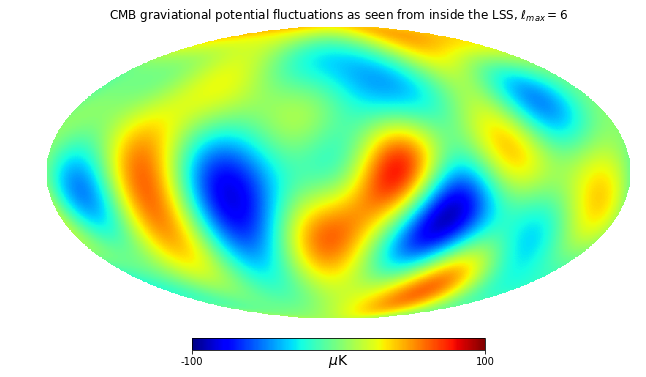

In [15]:
 beatbox.You.all_data_universes[n].show_CMB_T_map()

Generated  32  potential Fourier coefficients
 with phases uniformly distributed between 0 and  6.28318530718
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.4344352
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


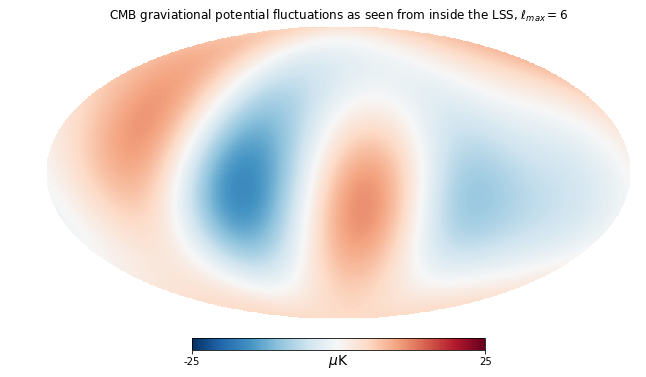

In [20]:
RecUni = beatbox.Universe()
RecUni.truncated_nmax=2
RecUni.truncated_lmax=6

RecUni.generate_a_random_potential_field(truncated_nmax=TrueUni.truncated_nmax, truncated_nmin=TrueUni.truncated_nmin, n_s=0.97,kstar=0.02,PSnorm=2.43e-9,Pdist=1,Pmax=2*np.pi,Pvar=0.0, printout=1)
RecUni.transform_3D_potential_into_alm(truncated_nmax=TrueUni.truncated_nmax, truncated_nmin=TrueUni.truncated_nmin,truncated_lmax=TrueUni.truncated_lmax, truncated_lmin=TrueUni.truncated_lmin,usedefault=4)

RecUni.fngrid = We.fngrid * TrueUni.kfilter
RecUni.transform_3D_potential_into_alm( truncated_nmax=TrueUni.truncated_nmax, truncated_nmin=TrueUni.truncated_nmin,truncated_lmax=TrueUni.truncated_lmax, truncated_lmin=TrueUni.truncated_lmin, usedefault=0)
RecUni.show_CMB_T_map(max=25, cmap=cmap)

In [16]:
beatbox.You.A = beatbox.You.NewAcov
beatbox.You.inv_A = beatbox.You.inv_NewAcov

p_value, chi2value = beatbox.You.calculate_chi2_in_posterior( TrueUni.fn, RecUni.fn)
pvals = np.append(pvals, p_value)
chi2vals = np.append(chi2vals, chi2value)

In [18]:
chi2vals

array([ 64.42572605])

In [19]:
pvals

array([ 0.0005863])

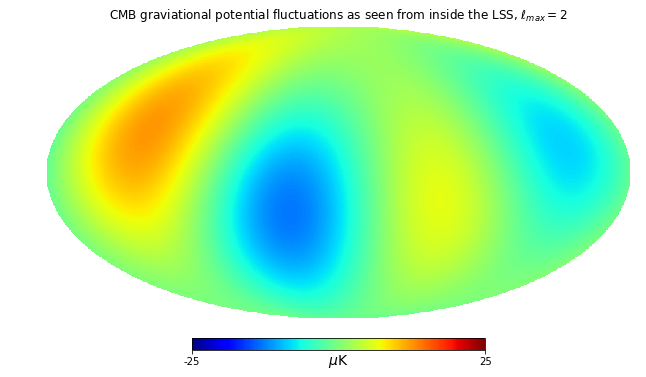

In [17]:
residual = beatbox.Universe()
residual.NSIDE = 256
residual.show_CMB_T_map(Tmap=RecUni.Tmap-beatbox.You.all_data_universes[n].Tmap, max=25)
residual.decompose_T_map_into_spherical_harmonics()

In [8]:
beatbox.You.solve_for_3D_potential_marginalized_over_large_n(datamap, print_alpha=0, truncated_nmax=2, nmax=None, NewAcov = beatbox.You.NewAcov)
    
filename = 'lmax=2'
    
np.savetxt( "../data/NewAcov_"+filename+".txt", beatbox.You.NewAcov)
    
    #execfile ('_ReconstructionScript.py')
MockUniverse[n]=beatbox.You.all_data_universes[n]
beatbox.You.all_reconstructed_universes[n].fn = beatbox.You.reconstrunct_fn
beatbox.You.all_reconstructed_universes[n].transform_3D_potential_into_alm(usedefault=1, fn=1)
beatbox.You.all_reconstructed_universes[n].rearrange_fn_from_vector_to_grid()
    #beatbox.You.all_reconstructed_universes[n].evaluate_potential_given_fourier_coefficients()
    
p_value, chi2value = beatbox.You.calculate_chi2_in_posterior( beatbox.You.all_simulated_universes[-1].fn, beatbox.You.all_reconstructed_universes[n].fn)
pvals = np.append(pvals, p_value)
chi2vals = np.append(chi2vals, chi2value)

TypeError: solve_for_3D_potential_marginalized_over_large_n() got an unexpected keyword argument 'inv_NewAcov'

In [7]:
U2, s2, V_star2 = np.linalg.svd(beatbox.You.NewAcov)
inv_NewAcov = np.dot(V_star2.T, np.dot(np.diag(1./s2),U2.T))
beatbox.You.inv_NewAcov=inv_NewAcov
 

ind = np.where(beatbox.Universe.kfilter>0)
        
k, theta, phi = beatbox.Universe.k[ind], np.arctan2(beatbox.Universe.ky[ind],beatbox.Universe.kx[ind]), np.arccos(beatbox.Universe.kz[ind]/beatbox.Universe.k[ind])
        
kvec_long = np.zeros(2*len(ind[1]))
kvec_long[:len(ind[1])] = k
kvec_long[len(ind[1]):] = k
        
kvec = np.zeros(len(ind[1]))
kvec[:len(ind[1])/2] = kvec_long[:len(ind[1])/2]
kvec[len(ind[1])/2:] = kvec_long[len(ind[1]):3*len(ind[1])/2]
        
ind_for_A_marginalization = np.argsort(kvec)
        
kvec1_ind = ind_for_A_marginalization[np.in1d(ind_for_A_marginalization, np.where(kvec <= 2*beatbox.Universe.Deltak), assume_unique=False)]
        
kvec2_ind = ind_for_A_marginalization[np.in1d(ind_for_A_marginalization, np.where(kvec > 2*beatbox.Universe.Deltak), assume_unique=False)]


beatbox.You.reconstrunct_fn=np.zeros((len(kvec1_ind)+len(kvec2_ind)))
beatbox.You.reconstrunct_fn[kvec1_ind] = beatbox.You.reconstrunct_fn_ordformarg
beatbox.You.reconstrunct_fn[kvec2_ind] = np.zeros(kvec1_ind.shape)

AttributeError: 'Multiverse' object has no attribute 'reconstrunct_fn_ordformarg'

In [6]:
MockUniverse[n]=beatbox.You.all_data_universes[n]
beatbox.You.all_reconstructed_universes[n].fn = beatbox.You.reconstrunct_fn
beatbox.You.all_reconstructed_universes[n].transform_3D_potential_into_alm(usedefault=1, fn=1)
beatbox.You.all_reconstructed_universes[n].rearrange_fn_from_vector_to_grid()
    #beatbox.You.all_reconstructed_universes[n].evaluate_potential_given_fourier_coefficients()
    
#p_value, chi2value = beatbox.You.calculate_chi2_in_posterior( beatbox.You.all_simulated_universes[-1].fn, beatbox.You.all_reconstructed_universes[n].fn)
#pvals = np.append(pvals, p_value)
#chi2vals = np.append(chi2vals, chi2value)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


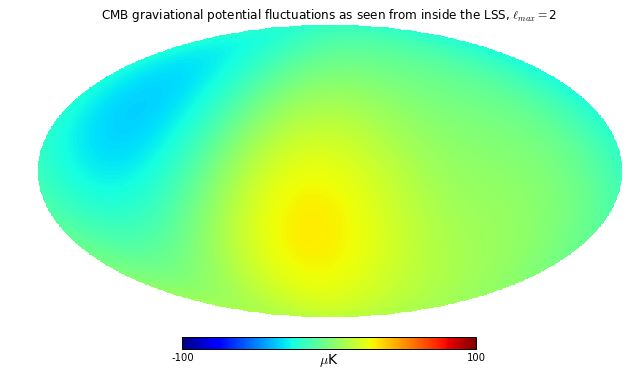

In [7]:
beatbox.You.all_reconstructed_universes[n].show_CMB_T_map()

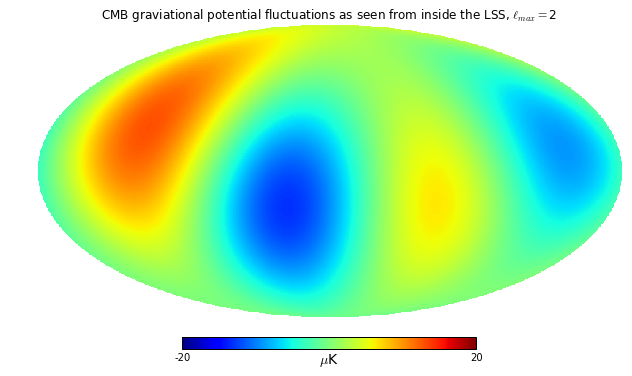

In [12]:
residual = beatbox.Universe()
residual.NSIDE = 256
residual.show_CMB_T_map(Tmap=beatbox.You.all_reconstructed_universes[n].Tmap-beatbox.You.all_simulated_universes[-1].truncated_map, max=20)
residual.decompose_T_map_into_spherical_harmonics()

In [14]:
beatbox.You.A = beatbox.You.NewAcov
beatbox.You.inv_A = beatbox.You.inv_NewAcov
p_value, chi2value = beatbox.You.calculate_chi2_in_posterior( beatbox.You.all_simulated_universes[-1].fn, beatbox.You.all_reconstructed_universes[n].fn)
pvals = np.append(pvals, p_value)
chi2vals = np.append(chi2vals, chi2value)

ValueError: shapes (32,32) and (14146,1) not aligned: 32 (dim 1) != 14146 (dim 0)

In [17]:
#beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, beatbox.Universe())
#beatbox.You.all_simulated_universes[-1].fngrid= beatbox.You.all_simulated_universes[0].fngrid*beatbox.Universe.kfilter
#beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm()
#fromthis = 'RobustnessAnalysis/MockUniverse_nmax15_lmax60_noiseupto8/TrueUniverse.fits'
#beatbox.You.all_simulated_universes[-1].read_in_CMB_T_map(from_this = fromthis)
#beatbox.You.all_simulated_universes[-1].decompose_T_map_into_spherical_harmonics(lmax=60)
#beatbox.You.all_simulated_universes[-1].alm2ay()
#beatbox.You.all_simulated_universes[-1].ay2alm(beatbox.You.all_simulated_universes[-1].ay)
#beatbox.You.all_simulated_universes[-1].show_CMB_T_map()
#execfile ('_SigmaDevPlot.py')
#print sigmas_dev, probabilities2, pvals, chi2vals
execfile('_CalcEvidence.py')


KeyboardInterrupt: 

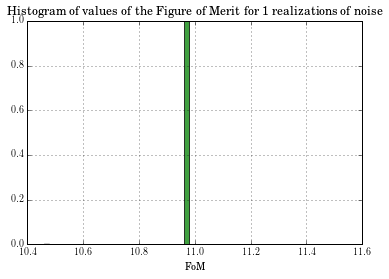

10.9596056383


In [10]:
execfile ('_FigofMerit.py')

Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 0.4062757
2.64401058448 2.92134215114 7.60161248818 -4.76820851039
-0.964678799028 4.09408958946 6.78449239852 -11.416975622


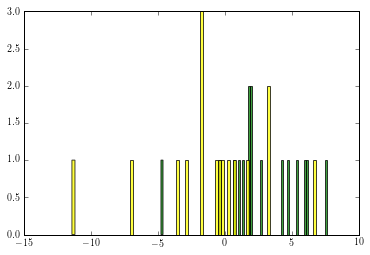

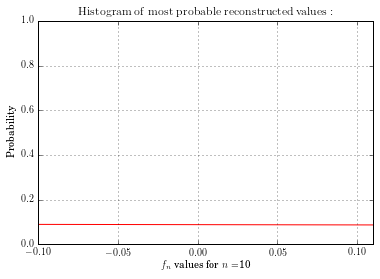

In [11]:
execfile ('_PlotMostProbVals.py')

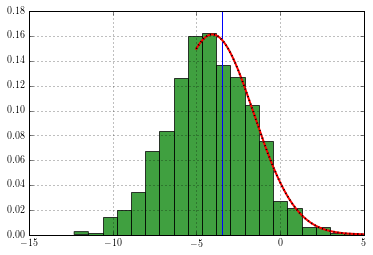

In [15]:
num = 3
execfile ('_PlotMargPost.py')

In [19]:
RecUni.evaluate_potential_given_fourier_coefficients()
RecUni.rearrange_fn_from_vector_to_grid()
RecUni.evaluate_potential_given_fourier_coefficients()


Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.1648863
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.1648863


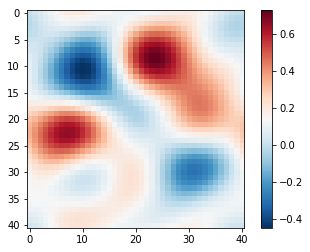

In [31]:
import matplotlib.pyplot as plt

plt.imshow(We.phi[21,:,:], cmap=cmap)
plt.colorbar()

In [20]:
TrueUni.evaluate_potential_given_fourier_coefficients()
TrueUni.rearrange_fn_from_vector_to_grid()
TrueUni.evaluate_potential_given_fourier_coefficients()



Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 0.8085538
Built potential grid, with dimensions  (41, 41, 41)  and mean value  -0.0 +/- 0.6961284


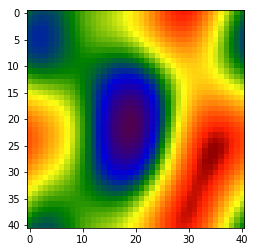

In [22]:
import matplotlib.pyplot as plt
plt.imshow(TrueUni.phi[:,21,:])

In [25]:
beatbox.You.all_data_universes[n].evaluate_potential_given_fourier_coefficients()
beatbox.You.all_data_universes[n].rearrange_fn_from_vector_to_grid()
beatbox.You.all_data_universes[n].evaluate_potential_given_fourier_coefficients()



AttributeError: 'Universe' object has no attribute 'fngrid'

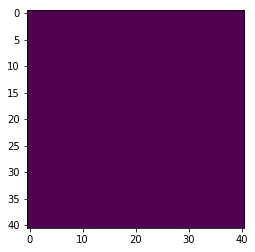

In [24]:
import matplotlib.pyplot as plt
plt.imshow(beatbox.You.all_data_universes[n].phi[:,21,:])

yt : [INFO     ] 2017-11-08 09:21:35,074 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-11-08 09:21:35,075 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2017-11-08 09:21:35,078 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2017-11-08 09:21:35,081 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2017-11-08 09:21:35,083 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2017-11-08 09:21:35,138 Loading field plugins.
yt : [INFO     ] 2017-11-08 09:21:35,139 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2017-11-08 09:21:35,140 Loaded astro (15 new fields)
yt : [INFO     ] 2017-11-08 09:21:35,141 Loaded cosmology (22 new fields)
yt : [INFO     ] 2017-11-08 09:21:35,143 Loaded fluid (64 new fields)
yt : [INFO     ] 2017-11-08 09:21:35,147 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2017-11-08 09:21:35,148 Loaded geometric (112 ne

-1.13074424265 0.819064083979



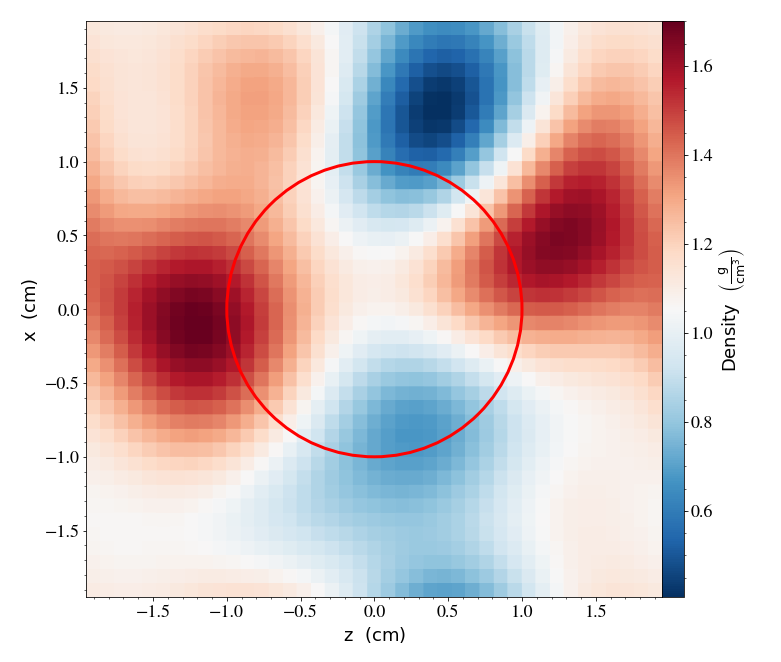

yt : [INFO     ] 2017-11-08 09:21:40,590 Saving plot phi_Slice_y_density.png


In [24]:
We.Pdist = 1
We.Pmax = 1
We.show_potential_with_yt(angle=np.pi/8,alpha_norm=5,  N_layer=5, cmap=cm.RdBu_r, show3D=0, Slice=1)

yt : [INFO     ] 2016-10-03 11:51:15,624 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-10-03 11:51:15,625 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-10-03 11:51:15,626 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-10-03 11:51:15,626 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-10-03 11:51:15,627 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-10-03 11:51:15,653 Loading field plugins.
yt : [INFO     ] 2016-10-03 11:51:15,654 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-10-03 11:51:15,655 Loaded astro (15 new fields)
yt : [INFO     ] 2016-10-03 11:51:15,656 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-10-03 11:51:15,657 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-10-03 11:51:15,659 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-10-03 11:51:15,660 Loaded geometric (112 ne

-1.23466096048 1.21604570992



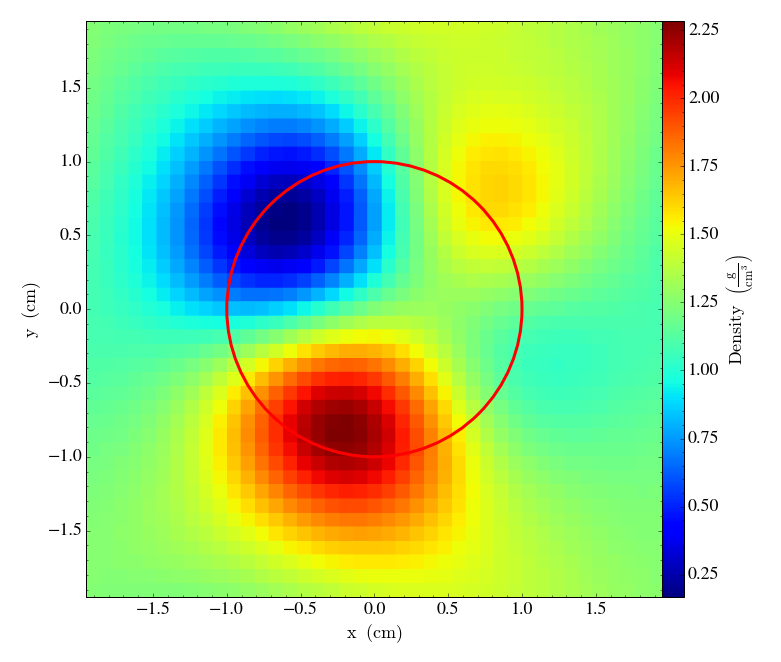

yt : [INFO     ] 2016-10-03 11:51:20,269 Saving plot phi_Slice_z_density.png


In [16]:
beatbox.You.all_reconstructed_universes[0].Pdist = 1
beatbox.You.all_reconstructed_universes[0].Pmax = 1
beatbox.You.all_reconstructed_universes[0].show_potential_with_yt(angle=np.pi/8,alpha_norm=5,  N_layer=5, cmap='BrBG', show3D=0, Slice=1)

In [25]:
a ,b = beatbox.You.calculate_chi2_in_posterior( beatbox.You.all_simulated_universes[-1].fn, beatbox.You.all_reconstructed_universes[-4].fn)
print a,b




IndexError: index -4 is out of bounds for axis 0 with size 2

In [ ]:
chi2.cdf(428.9, 924) 



In [ ]:
print np.dot(np.dot((beatbox.You.all_simulated_universes[2].fn - beatbox.You.all_reconstructed_universes[0].fn), beatbox.You.inv_A), (beatbox.You.all_simulated_universes[2].fn - beatbox.You.all_reconstructed_universes[0].fn).T)

In [13]:
print 100*np.sqrt(np.mean(realbias**2/PS[:(len(beatbox.You.all_reconstructed_universes[-1].fn)/2)]) )
print 100*np.sqrt(np.mean(imagbias**2/PS[(len(beatbox.You.all_reconstructed_universes[-1].fn)/2):]) )

1.55256087478
0.000484375473096


In [ ]:
n, bins, patches = plt.hist(np.diag(beatbox.You.inv_A)[:(len(beatbox.You.all_reconstructed_universes[-1].fn)/2)], 40, normed=0, facecolor='green', alpha=0.75)

n, bins, patches = plt.hist(np.diag(beatbox.You.inv_A)[(len(beatbox.You.all_reconstructed_universes[-1].fn)/2):], 40, normed=0, facecolor='yellow', alpha=0.75)

plt.savefig('RobustnessAnalysis/rob_plt_lmax'+str(beatbox.Universe.truncated_lmax)+'_lmin'+str(beatbox.Universe.truncated_lmin)+'_nmax'+str(beatbox.Universe.truncated_nmax)+'_nmin'+str(beatbox.Universe.truncated_nmin)+'/A_histogram.png')

#plt.axis([0, 52, 0, 0.2])



plt.show()

In [14]:
print 100.*np.mean(np.sqrt(np.diag(beatbox.You.inv_A)[:(len(beatbox.You.all_reconstructed_universes[-1].fn)/2)]/PS[:(len(beatbox.You.all_reconstructed_universes[-1].fn)/2)]))
print 100.*np.mean(np.sqrt(np.diag(beatbox.You.inv_A)[(len(beatbox.You.all_reconstructed_universes[-1].fn)/2):]/PS[(len(beatbox.You.all_reconstructed_universes[-1].fn)/2):]))
print 100.*np.mean(np.sqrt(np.diag(beatbox.You.inv_A)/PS))

21.7885383522
0.069641963039
10.9290901576


In [15]:
print 100.*np.mean(np.sqrt(realbias**2/np.diag(beatbox.You.inv_A)[:(len(beatbox.You.all_reconstructed_universes[-1].fn)/2)]))
print 100.*np.mean(np.sqrt(imagbias**2/np.diag(beatbox.You.inv_A)[(len(beatbox.You.all_reconstructed_universes[-1].fn)/2):]))

7.11732164915
0.660377431282


In [ ]:
np.mean(np.sqrt((beatbox.You.all_reconstructed_universes[-1].fn - beatbox.You.all_simulated_universes[2].fn)**2/np.diag(beatbox.You.inv_A)))

In [ ]:
beatbox.You.C_yy.shape

In [ ]:
print np.mean(np.sqrt((beatbox.You.all_simulated_universes[-1].fn-beatbox.You.all_reconstructed_universes[-1].fn)**2/np.diag(beatbox.You.inv_A)))
print np.mean(np.sqrt((beatbox.You.all_reconstructed_universes[-1].fn - beatbox.You.all_simulated_universes[-1].fn)**2/np.diag(beatbox.You.inv_A)))
print len(np.where((beatbox.You.all_simulated_universes[-1].fn-beatbox.You.all_reconstructed_universes[500].fn)/np.sqrt(np.diag(beatbox.You.inv_A)) < 1.)[0])/float(len(beatbox.You.all_reconstructed_universes[-1].fn))    

In [ ]:
print beatbox.You.all_simulated_universes[1001].fn[0:30]
print beatbox.You.all_reconstructed_universes[500].fn[0:30]

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


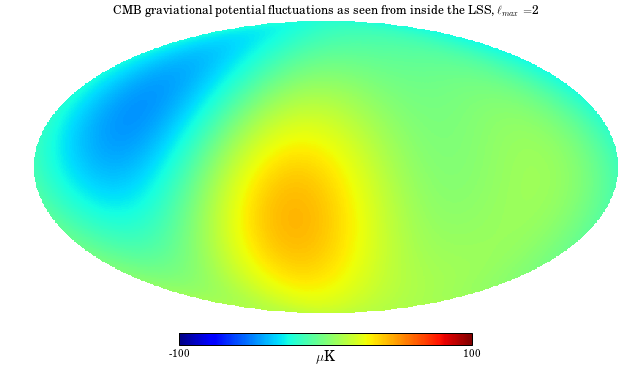

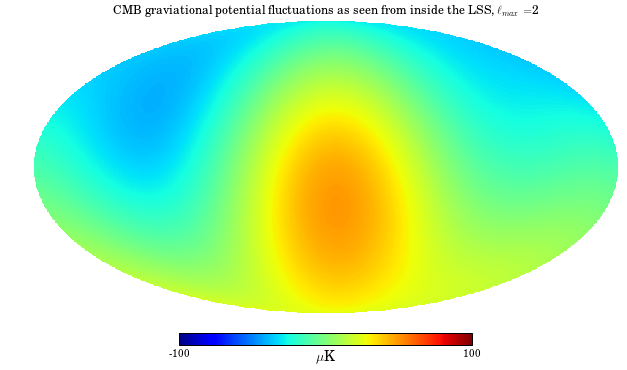

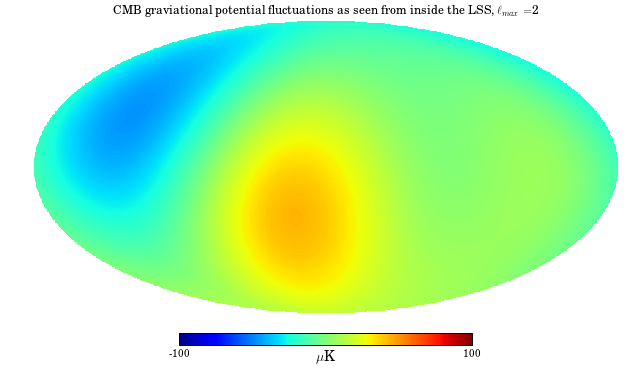

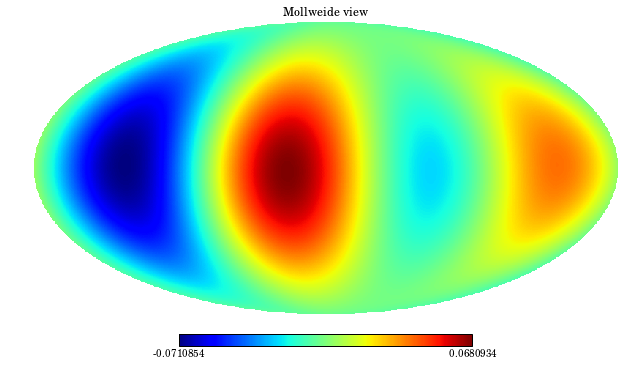

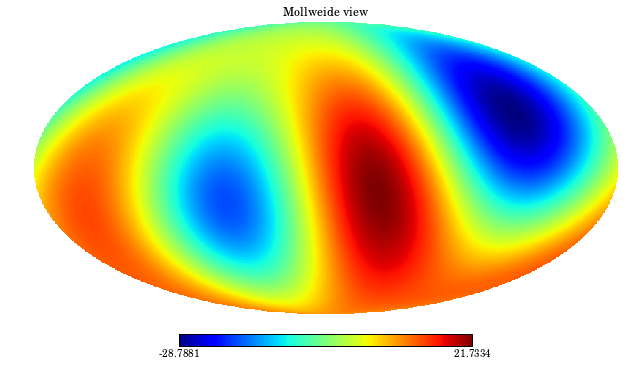

In [16]:
beatbox.You.all_data_universes[0].show_CMB_T_map()
beatbox.You.all_simulated_universes[1].show_CMB_T_map()
beatbox.You.all_reconstructed_universes[0].show_CMB_T_map()
hp.mollview(beatbox.You.all_data_universes[0].Tmap-beatbox.You.all_reconstructed_universes[0].Tmap,  rot=(-90,0,0))
hp.mollview(beatbox.You.all_simulated_universes[-1].Tmap-beatbox.You.all_reconstructed_universes[0].Tmap,  rot=(-90,0,0))

In [ ]:
beatbox.You.all_simulated_universes[0].lmax=60
beatbox.You.all_simulated_universes[0].show_lowest_spherical_harmonics_of_CMB_T_map(lmax=8,max=100)
hp.mollview(beatbox.You.all_simulated_universes[0].truncated_map-beatbox.You.all_simulated_universes[-1].Tmap, rot=(-90,0,0),  min=-100, max=100 )

In [ ]:
beatbox.You.all_simulated_universes.shape